In [27]:
import collections
import pandas as pd
import numpy as np

import matplotlib.cm as cm
from matplotlib import rcParams

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [3]:
canada = pd.read_csv("news.csv")

In [4]:
canada

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...
5,5,['Mark Gollom Is A Toronto-Based Reporter With...,'Worse' pandemic on horizon unless world deals...,2020-03-27 08:00:00,"The continued existence of wildlife markets, w...","The continued existence of wildlife markets, w...",https://www.cbc.ca/news/world/wildlife-markets...
6,6,['Cbc News'],What you need to know about COVID-19 in Ottawa...,2020-03-27 08:00:00,CBC Ottawa's latest roundup of key points duri...,Recent developments: Two new cases in western...,https://www.cbc.ca/news/canada/ottawa/covid19-...
7,7,['The Associated Press'],Michigan hospitals jammed as coronavirus cases...,2020-03-26 11:02:00,Michigan hospitals are bracing for a surge of ...,Michigan hospitals are bracing for a surge of ...,https://www.cbc.ca/news/canada/windsor/michiga...
8,8,['Thomson Reuters'],U.S. coronavirus cases now highest in the world,2020-03-26 14:55:00,The number of confirmed COVID-19 cases in the ...,The number of confirmed COVID-19 cases in the ...,https://www.cbc.ca/news/world/us-coronavirus-t...
9,9,"['Leah Hendry Is A Tv', 'Radio', 'Online Journ...","'Avoid the emergency' pleads Jewish General, a...",2020-03-27 08:00:00,"Montreal's Jewish General Hospital, one of the...",The Jewish General Hospital plans to set up tr...,https://www.cbc.ca/news/canada/montreal/jewish...


In [5]:
#two wordclouds
#second will be general for all the articles regardless of author using canada flag

most_common_authors = canada[["authors", "title"]]

most_common_authors.head()

,authors,title
0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...
1,['Cbc News'],Yukon gov't names 2 possible sources of corona...
2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package
3,['Cbc News'],Coronavirus: The latest in drug treatment and ...
4,['Cbc News'],The latest on the coronavirus outbreak for Mar...


In [6]:
most_common_authors_table = most_common_authors["authors"].value_counts()

most_common_authors_table = pd.DataFrame(most_common_authors_table)

most_common_authors_table.head(10)

,authors
[],1177
['Cbc News'],1168
['The Associated Press'],178
['Thomson Reuters'],86
['The Canadian Press'],82
"['Reporter Editor', 'Bobhristova Is A Reporter Editor With Cbc Hamilton. Email', 'Bobby.Hristova Cbc.Ca', 'Follow', 'Bobbyhristova On Twitter']",30
"['Business Reporter', 'Sophia Harris Covers Business', 'Consumer News.', 'Contact', 'Sophia.Harris Cbc.Ca', 'More This Author']",15
"['Web Writer', 'Sam Juric Is A Journalist With Cbc P.E.I.', 'Can Be Reached At Samantha.Juric Cbc.Ca.']",14
"['Reporter Editor', 'Jennifer La Grassa Is A Reporter Editor For Cbc Hamilton. Email', 'Jennifer.Lagrassa Cbc.Ca', 'Follow', 'Jennlagrassa On Twitter']",14
"['Mark Gollom Is A Toronto-Based Reporter With Cbc News. He Covers Canadian', 'U.S. Politics', 'Current Affairs.']",14


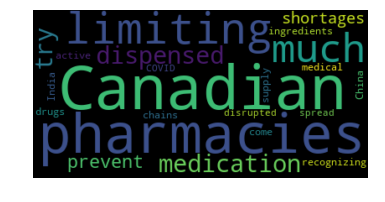

In [9]:
#wordcloud for one news article

text = canada.description[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


#another wordcloud for the rest of the articles combined , one for title and one for descriptions


In [22]:
#Wordcloud for all the text include a stopword 
ca_text = " ".join(word for word in canada.text)
print ("There are {} words in the combination of all review.".format(len(ca_text)))

There are 15796973 words in the combination of all review.


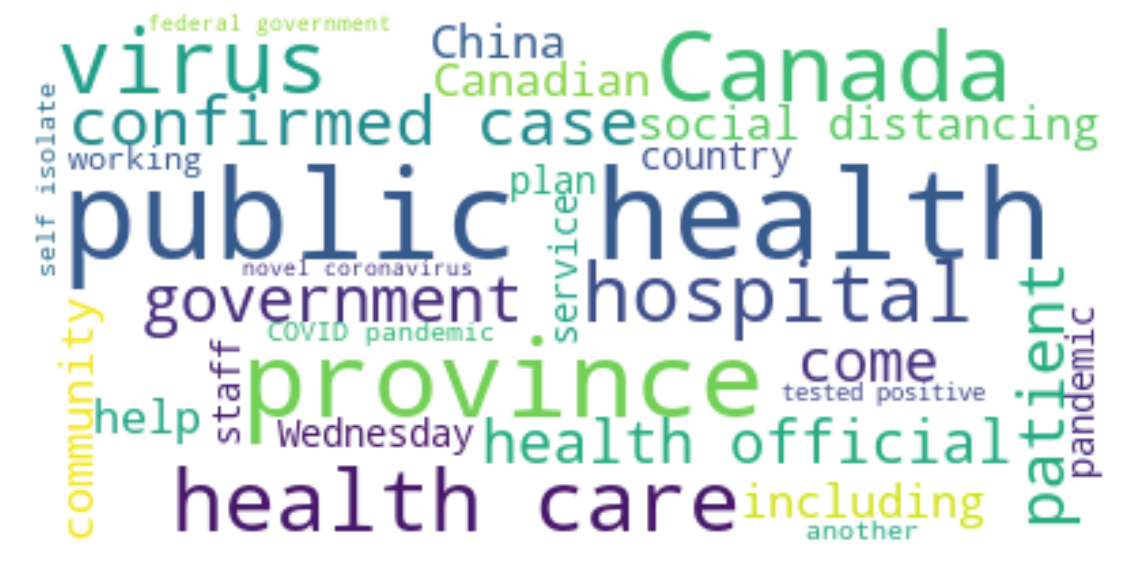

In [30]:
stopwords = set(STOPWORDS)
stopwords.update(["one", "say", "time", "href", "https", "need", "people", "day", "may", "going", "Friday", "Tuesday",
                  "said", "per" , "cent", "says", "many", "still", "now", "thing", "Monday", "will", "part", "make",
                  "CBC", "New", "right", "viru", " country", "work", "take", "home", "even", "Thursday", "continue",
                  "want", "take", "city", "call", "March", "think", "well", "know", "way", "see", "go", "The", "-"])


wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words = 30).generate(ca_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
filtered_words = [word for word in ca_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

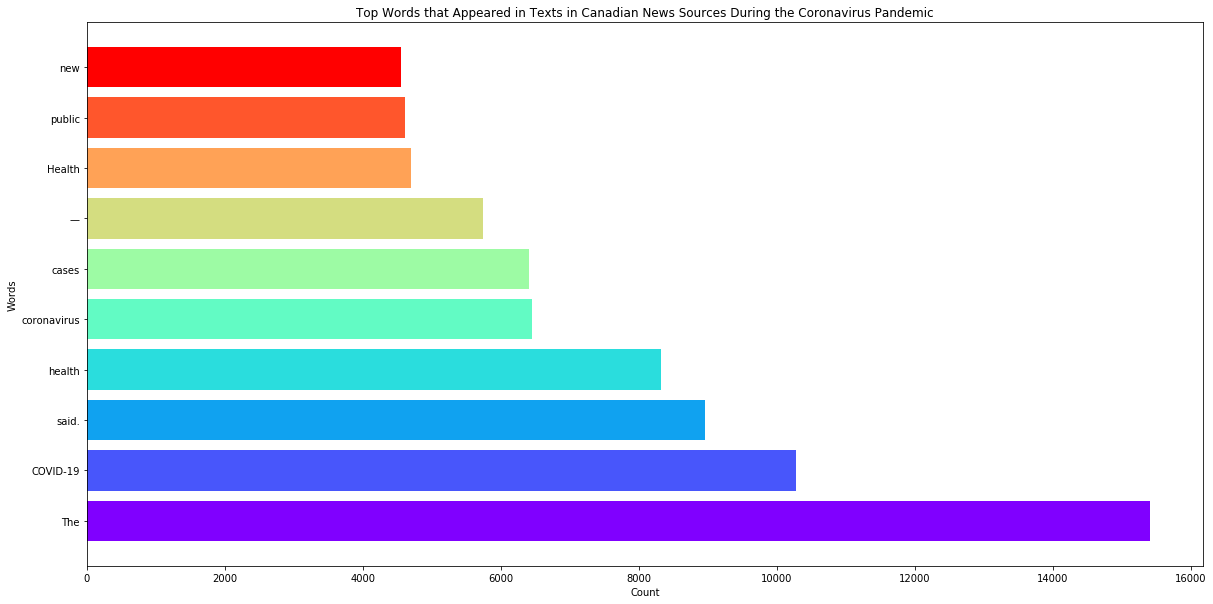

In [31]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top Words that Appeared in Texts in Canadian News Sources During the Coronavirus Pandemic')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)